## Telecom Churn Prediction:

#### Using Decision trees and Random Forest:

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",50)

**Data Loading**

In [3]:
churn = pd.read_csv("churn_data.csv")
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer = pd.read_csv("customer_data.csv")
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet = pd.read_csv("internet_data.csv")
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


**Combining the Dataframes**

In [6]:
telecom = pd.merge(churn,customer, on = "customerID", how = "inner")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [7]:
telecom = pd.merge(telecom,internet, how="inner", on = "customerID")
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


**Data Inspection**

In [8]:
telecom.shape

(7043, 21)

In [9]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [10]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [11]:
#changing the datatype of Total charges:
telecom["TotalCharges"] = pd.to_numeric(telecom["TotalCharges"], errors = "coerce")

In [12]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [13]:
telecom.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [14]:
telecom = telecom[~telecom["TotalCharges"].isnull()]

In [15]:
telecom.shape

(7032, 21)

In [16]:
telecom.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**Data Preparation for EDA**

In [17]:
# converting the Binary categorical variables yes/no into 1/0
telecom["PhoneService"].value_counts()
telecom["PhoneService"] = telecom["PhoneService"].map({"Yes":1,"No":0})
telecom["PhoneService"].value_counts()

1    6352
0     680
Name: PhoneService, dtype: int64

In [18]:
telecom["PaperlessBilling"].value_counts()
telecom["PaperlessBilling"] = telecom["PaperlessBilling"].map({"Yes":1,"No":0})
telecom["PaperlessBilling"].value_counts()

1    4168
0    2864
Name: PaperlessBilling, dtype: int64

In [19]:
vars = ["Churn", "Partner","Dependents"]

def binarymap(x):
    return x.map({"Yes":1,"No":0})

telecom[vars] = telecom[vars].apply(binarymap)

In [20]:
telecom["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [21]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


**EDA**

In [22]:
# Univariate Analysis:

telecom["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

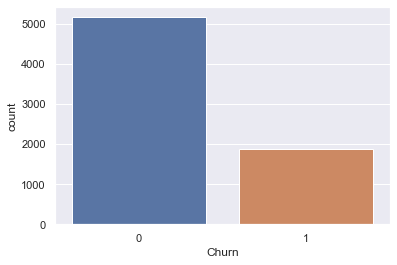

In [23]:
sns.set_theme()
sns.countplot(telecom["Churn"])

<AxesSubplot:xlabel='gender', ylabel='count'>

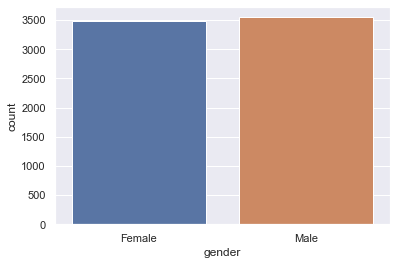

In [24]:
sns.countplot(telecom["gender"])

<AxesSubplot:xlabel='Contract', ylabel='count'>

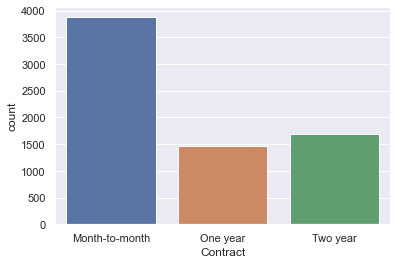

In [25]:
sns.countplot(telecom["Contract"])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

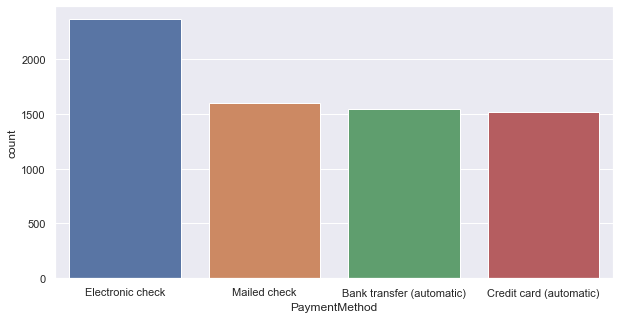

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(telecom["PaymentMethod"])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

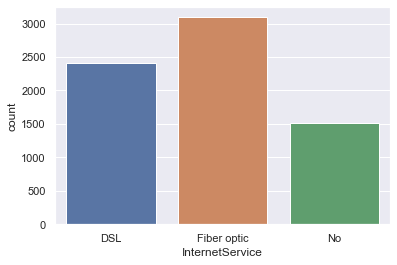

In [27]:
sns.countplot(telecom["InternetService"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

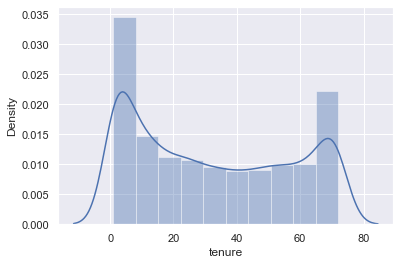

In [28]:
sns.distplot(telecom["tenure"], bins = 10)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

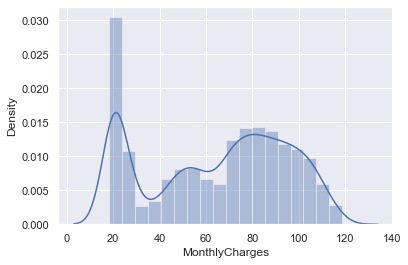

In [29]:
sns.distplot(telecom["MonthlyCharges"])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

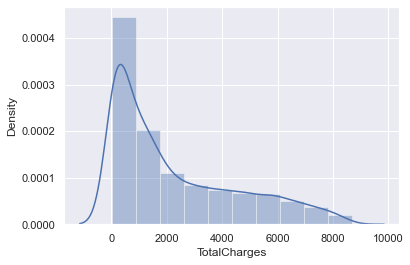

In [30]:
sns.distplot(telecom["TotalCharges"], bins = 10)

In [31]:
#Bi- variate Analysis:

telecom[["tenure","MonthlyCharges","TotalCharges"]].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


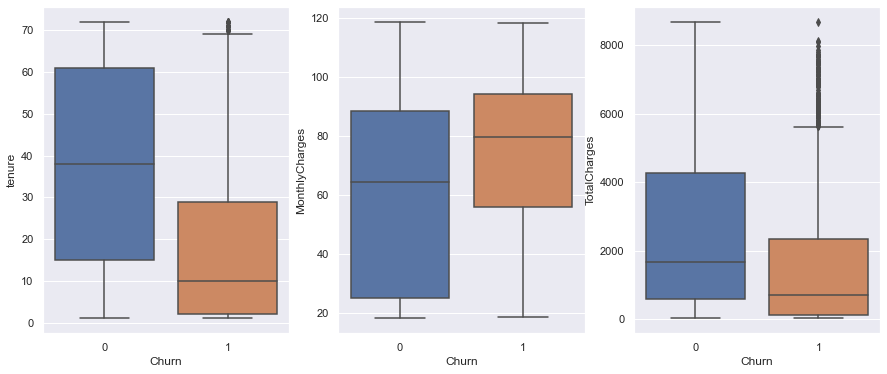

In [32]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x=telecom["Churn"], y=telecom["tenure"], data=telecom)
plt.subplot(1,3,2)
sns.boxplot(x=telecom["Churn"], y=telecom["MonthlyCharges"], data=telecom)
plt.subplot(1,3,3)
sns.boxplot(x=telecom["Churn"], y=telecom["TotalCharges"], data=telecom)
plt.show()

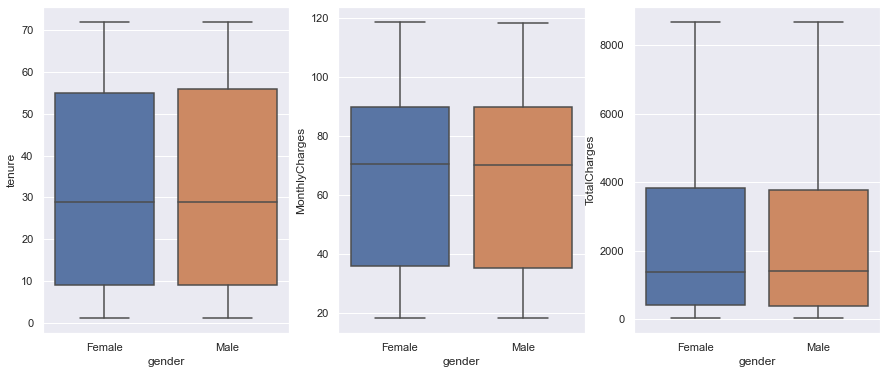

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(x=telecom["gender"], y=telecom["tenure"], data=telecom)
plt.subplot(1,3,2)
sns.boxplot(x=telecom["gender"], y=telecom["MonthlyCharges"], data=telecom)
plt.subplot(1,3,3)
sns.boxplot(x=telecom["gender"], y=telecom["TotalCharges"], data=telecom)
plt.show()

**Data Preparation for modelling**

In [34]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["Contract"], drop_first=True,prefix = "Contract" )
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("Contract", axis=1)

In [35]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["PaymentMethod"], drop_first=True,prefix = "PaymentMethod" )
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("PaymentMethod", axis=1)

In [36]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["gender"], drop_first=True,prefix = "gender" )
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("gender", axis=1)

In [37]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["InternetService"], drop_first=True,prefix = "InternetService" )
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("InternetService", axis=1)

In [38]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["MultipleLines"],prefix = "Multiplelines" )

dv = dv.drop("Multiplelines_No phone service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("MultipleLines", axis=1)

In [39]:
# creating the dummy variables:
dv = pd.get_dummies(telecom["OnlineSecurity"],prefix = "OnlineSecurity" )

dv = dv.drop("OnlineSecurity_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("OnlineSecurity", axis=1)

dv = pd.get_dummies(telecom["OnlineBackup"],prefix = "OnlineBackup" )
dv = dv.drop("OnlineBackup_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("OnlineBackup", axis=1)



dv = pd.get_dummies(telecom["TechSupport"],prefix = "TechSupport" )
dv = dv.drop("TechSupport_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("TechSupport", axis=1)

dv = pd.get_dummies(telecom["StreamingTV"],prefix = "StreamingTV" )
dv = dv.drop("StreamingTV_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("StreamingTV", axis=1)

dv = pd.get_dummies(telecom["StreamingMovies"],prefix = "StreamingMovies" )
dv = dv.drop("StreamingMovies_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("StreamingMovies", axis=1)


In [40]:
telecom.head()
telecom["DeviceProtection"].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [41]:
dv = pd.get_dummies(telecom["DeviceProtection"],prefix = "DeviceProtection" )
dv = dv.drop("DeviceProtection_No internet service", axis=1)
telecom = pd.concat([telecom,dv],axis=1)
telecom = telecom.drop("DeviceProtection", axis=1)

In [42]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,Multiplelines_No,Multiplelines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [43]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   tenure                                 7032 non-null   int64  
 2   PhoneService                           7032 non-null   int64  
 3   PaperlessBilling                       7032 non-null   int64  
 4   MonthlyCharges                         7032 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7032 non-null   int64  
 7   SeniorCitizen                          7032 non-null   int64  
 8   Partner                                7032 non-null   int64  
 9   Dependents                             7032 non-null   int64  
 10  Contract_One year                      7032 non-null   uint8  
 11  Cont

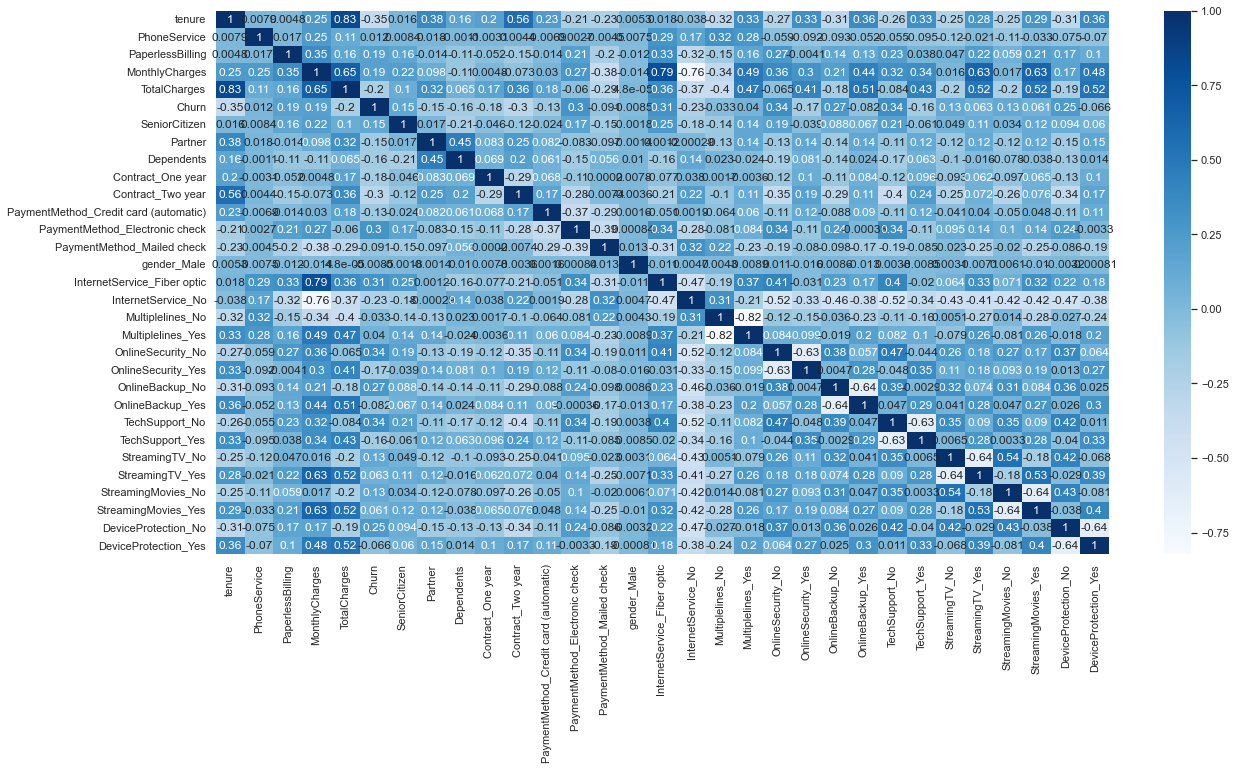

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(), annot=True, cmap="Blues")
plt.show()

**Splitting Training and Testing data**

In [45]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,Multiplelines_No,Multiplelines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [47]:
x = telecom.drop(["customerID", "Churn"], axis=1)
y = telecom["Churn"]

In [48]:
x.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,Multiplelines_No,Multiplelines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,DeviceProtection_No,DeviceProtection_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [49]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=100, train_size=0.7)

In [53]:
print(x_train.shape)
print(x_test.shape)

(4922, 30)
(2110, 30)


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(random_state=50, max_depth=4)

In [60]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=50)

In [61]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

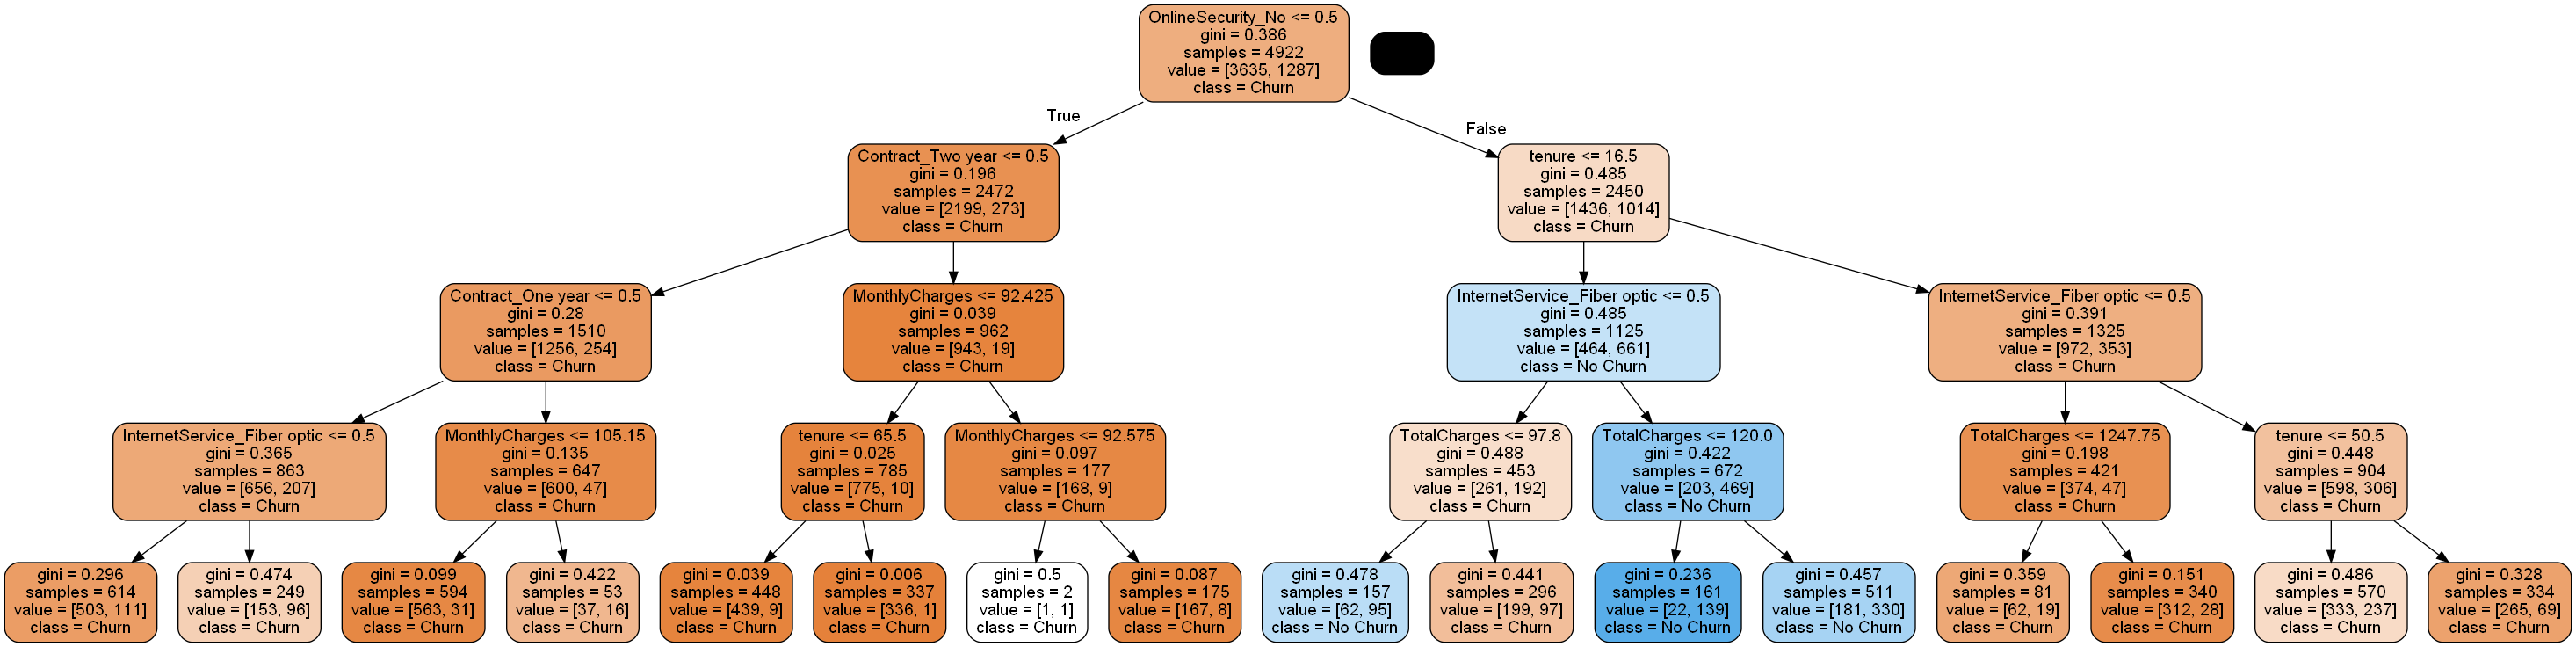

In [62]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, rounded=True, filled=True, feature_names=x.columns,
                class_names=["Churn", "No Churn"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [64]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3635
           1       0.68      0.44      0.53      1287

    accuracy                           0.80      4922
   macro avg       0.75      0.68      0.70      4922
weighted avg       0.79      0.80      0.78      4922



In [67]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1528
           1       0.67      0.45      0.54       582

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.77      2110



In [68]:
#ROD
from sklearn.metrics import plot_roc_curve

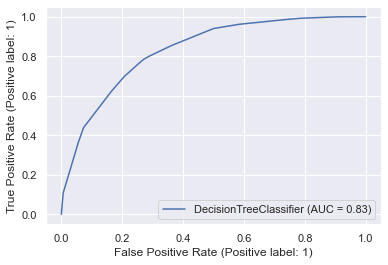

In [71]:
plot_roc_curve(dt, x_train,y_train, drop_intermediate=False)

In [72]:
# Hyper Parameter tuning:

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
dt = DecisionTreeClassifier(random_state=50)

In [75]:
params = {"max_depth": [2,3,4,5,10,12,15,20],
         "min_samples_leaf": [5,10,20,30,40,40,50,100]}

In [76]:
Grid_seach = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1,scoring="accuracy")

In [77]:
Grid_seach.fit(x_train,y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 12, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 30, 40, 40, 50, 100]},
             scoring='accuracy', verbose=1)

In [78]:
Grid_seach.best_score_

0.8002848170236374

In [80]:
dt_best = Grid_seach.best_estimator_

In [81]:
y_train_pred = dt_best.predict(x_train)
y_test_pred = dt_best.predict(x_test)

In [82]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3635
           1       0.69      0.53      0.60      1287

    accuracy                           0.82      4922
   macro avg       0.77      0.73      0.74      4922
weighted avg       0.81      0.82      0.81      4922

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1528
           1       0.66      0.52      0.58       582

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110



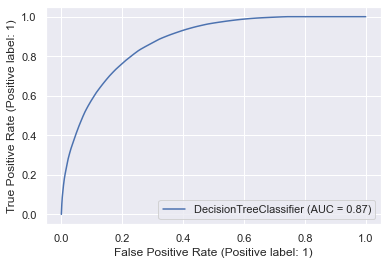

In [86]:
plot_roc_curve(dt_best,x_train,y_train,drop_intermediate=False)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5,random_state=50,oob_score=True)

In [91]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=50)

In [92]:
rf.oob_score_

0.7901259650548558

In [93]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [94]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3635
           1       0.70      0.40      0.51      1287

    accuracy                           0.80      4922
   macro avg       0.76      0.67      0.69      4922
weighted avg       0.78      0.80      0.78      4922

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1528
           1       0.69      0.43      0.53       582

    accuracy                           0.79      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.79      0.77      2110



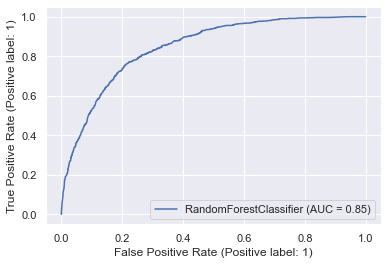

In [95]:
plot_roc_curve(rf, x_train,y_train)

In [96]:
# Hypertuning:

In [97]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [98]:
params = {"max_depth": [2,3,4,5,10,15,20,50],
         "min_samples_leaf": [5,10,30,50,100,200],
         "n_estimators":[5,10,20,50,100]}

In [99]:
Grid_seach = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1,cv=4, scoring="accuracy")

In [100]:
Grid_seach.fit(x_train,y_train)

Fitting 4 folds for each of 240 candidates, totalling 960 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20, 50],
                         'min_samples_leaf': [5, 10, 30, 50, 100, 200],
                         'n_estimators': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [101]:
Grid_seach.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=100)

In [102]:
rf= Grid_seach.best_estimator_

In [103]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [104]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3635
           1       0.81      0.63      0.71      1287

    accuracy                           0.87      4922
   macro avg       0.85      0.79      0.81      4922
weighted avg       0.86      0.87      0.86      4922

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1528
           1       0.65      0.50      0.57       582

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



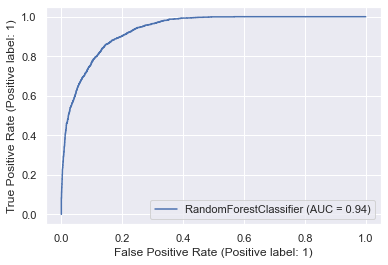

In [105]:
plot_roc_curve(rf, x_train,y_train,drop_intermediate=False)

In [106]:
rf.feature_importances_

array([0.16621663, 0.00436855, 0.02050557, 0.1052172 , 0.14408729,
       0.01415902, 0.01177225, 0.01107497, 0.03842553, 0.05837499,
       0.00761234, 0.04044284, 0.00822441, 0.01497917, 0.0783691 ,
       0.00820877, 0.01057404, 0.00894355, 0.08101231, 0.01323985,
       0.0307758 , 0.00997966, 0.04525608, 0.01361514, 0.00867814,
       0.00973607, 0.00840963, 0.0095579 , 0.00951002, 0.00867319])

In [109]:
feature_importance = pd.DataFrame({"Features": x_train.columns,
                                 "Importance":rf.feature_importances_})

In [112]:
feature_importance.sort_values(by = "Importance", ascending=False)

,Features,Importance
0,tenure,0.166217
4,TotalCharges,0.144087
3,MonthlyCharges,0.105217
18,OnlineSecurity_No,0.081012
14,InternetService_Fiber optic,0.078369
9,Contract_Two year,0.058375
22,TechSupport_No,0.045256
11,PaymentMethod_Electronic check,0.040443
8,Contract_One year,0.038426
20,OnlineBackup_No,0.030776
